# Wizualizacja danych

### Importy

In [1]:
import eda
import clustering
import evaluation
import visualization
import pandas as pd

c:\Users\pawli\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Wczytanie i przygotowanie danych

In [2]:
# Wczytanie danych
file_path = 'C:/Users/pawli/OneDrive/Pulpit/cocktail_dataset.json'
df = eda.load_data(file_path)

# Przekształcanie i skalowanie danych
scaled_data = clustering.preprocess_data(df)

# Wyświetlenie przeskalowanych danych
print(scaled_data.shape)

Typy danych w df_full:
id                                int64
alcoholic                         int64
category_Cocktail               float64
category_Ordinary Drink         float64
category_Punch / Party Drink    float64
                                 ...   
White Creme de Menthe             int64
Wine                              int64
Worcestershire Sauce              int64
Yellow Chartreuse                 int64
lemon                             int64
Length: 118, dtype: object
      id  alcoholic  category_Cocktail  category_Ordinary Drink  \
0  11000          1                1.0                      0.0   
1  11001          1                1.0                      0.0   
2  11002          1                0.0                      1.0   
3  11003          1                0.0                      1.0   
4  11004          1                0.0                      1.0   

   category_Punch / Party Drink  glass_Brandy snifter  glass_Champagne flute  \
0                          

### EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                134 non-null    int64 
 1   name              134 non-null    object
 2   category          134 non-null    object
 3   glass             134 non-null    object
 4   tags              35 non-null     object
 5   instructions      134 non-null    object
 6   imageUrl          134 non-null    object
 7   alcoholic         134 non-null    int64 
 8   createdAt         134 non-null    object
 9   updatedAt         134 non-null    object
 10  ingredients       134 non-null    object
 11  ingredient_names  134 non-null    object
dtypes: int64(2), object(10)
memory usage: 12.7+ KB
Podstawowe informacje o danych: None

Podgląd danych:       id             name        category                glass  \
0  11000           Mojito        Cocktail       Highball glass   
1  11001    O

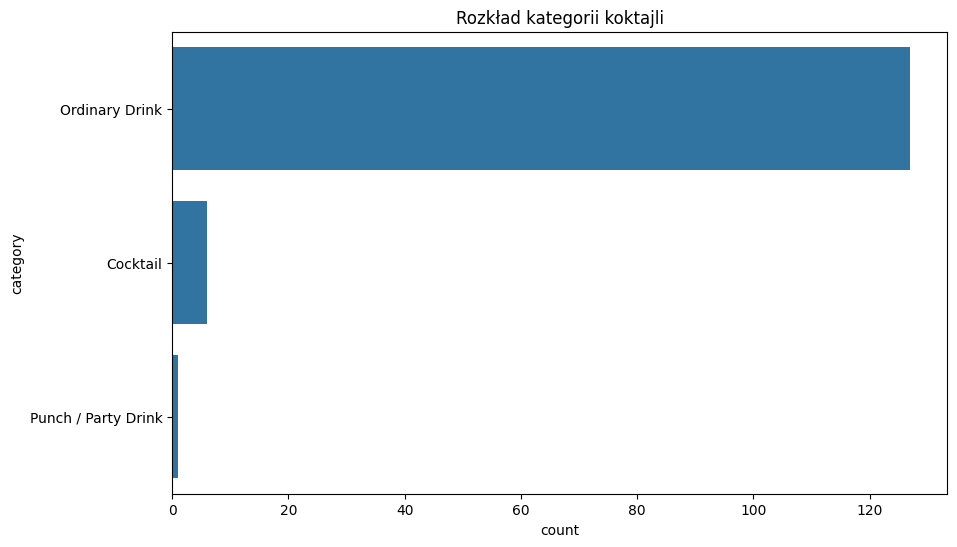

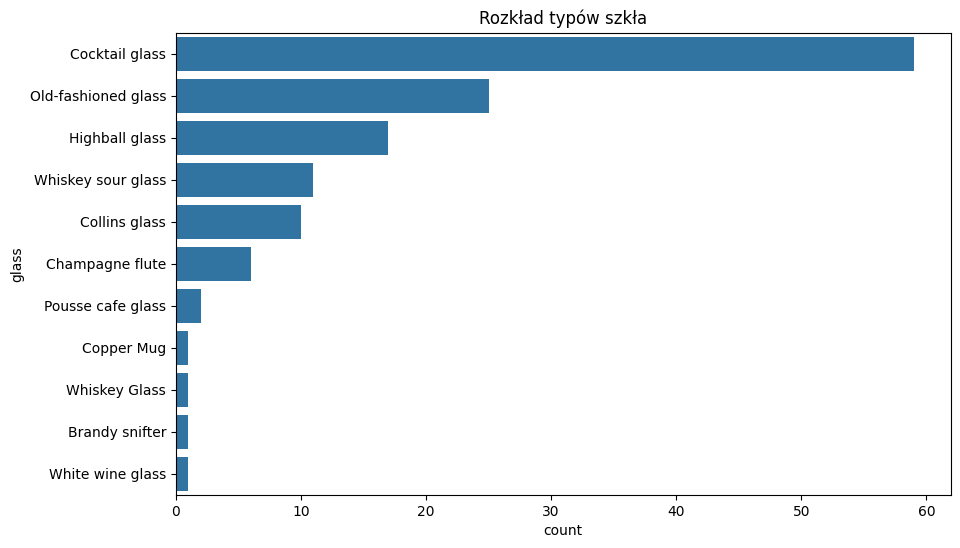

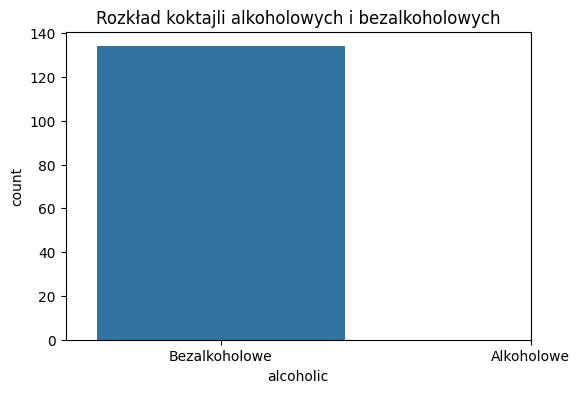

In [3]:
# Eksploracyjna analiza danych
eda.basic_info(df)
eda.check_missing_data(df)

# Wizualizacje
eda.plot_category_distribution(df)
eda.plot_glass_distribution(df)
eda.alcoholic_distribution(df)

### Klasteryzacja

In [4]:
# Klasteryzacja K-means
kmeans_clusters = clustering.kmeans_clustering(scaled_data, n_clusters=5)

# Klasteryzacja DBSCAN
dbscan_clusters = clustering.dbscan_clustering(scaled_data, eps=1.5, min_samples=1)



K-means: Zidentyfikowane klastry: 5
DBSCAN: Zidentyfikowane klastry: 133


### Ewaluacja wyników klasteryzacji

In [5]:
# Ewaluacja K-means
evaluation.evaluate_clusters(scaled_data, kmeans_clusters, method="K-means")

# Ewaluacja DBSCAN
evaluation.evaluate_clusters(scaled_data, dbscan_clusters, method="DBSCAN")

K-means - Silhouette Score: 0.0698
K-means - Davies-Bouldin Score: 1.9982
DBSCAN - Silhouette Score: 0.0114
DBSCAN - Davies-Bouldin Score: 0.0494


### Wizualizacja klastrów

c:\Users\pawli\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


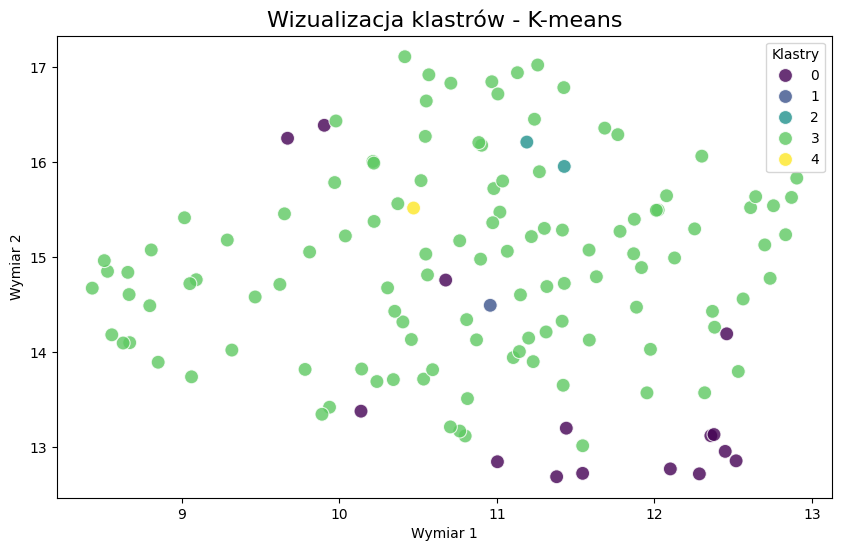

c:\Users\pawli\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


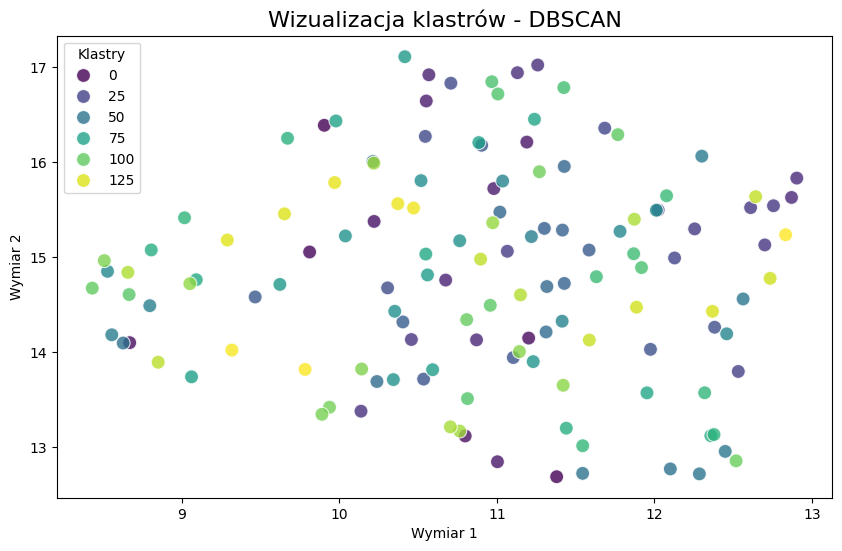

In [6]:
import visualization

# Wizualizacja klastrów K-means
visualization.visualize_clusters(scaled_data, kmeans_clusters, method="K-means")

# Wizualizacja klastrów DBSCAN
visualization.visualize_clusters(scaled_data, dbscan_clusters, method="DBSCAN")

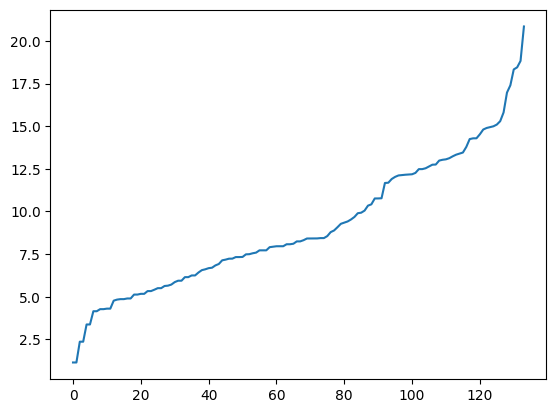

In [7]:

#Wyznaczenie współczynnika eda
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)
distances = np.sort(distances[:, 1], axis=0)
plt.plot(distances)
plt.show()